# Prédictions avec le model efficientnetb1 entrainé

> https://www.tensorflow.org/tutorials/images/classification#visualize_training_results

## Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import os
import mlflow
import setuptools
import requests
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

print("tensorflow version",tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-09-30 21:37:43.898186: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 21:37:43.901129: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 21:37:43.911823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 21:37:43.929550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 21:37:43.934539: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-30 21:37:43.947141: I tensorflow/core/platform/cpu_feature_gu

tensorflow version 2.17.0
Num GPUs Available:  0


## Initialisation de MLflow

In [2]:
loaded_model = tf.keras.models.load_model("heuzef_efficientnetb1_010_artifacts.keras")

loaded_model

<Functional name=functional, built=True>

## Préparation des nouvelles donnés pour les predictions

Nos classes sont les suivantes :

In [3]:
mo_db_path="../../data/LAYER2/MO/test/"
names_csv_path="../../data/LAYER2/names.csv"

def get_champi_name(mo_db_path, names_csv_path):
    """
    Retourne le nom de la classe du champignon depuis le fichier names.csv de Mushroom Observer.
    Requiere numpy, pandas et os.

    Args:
        mo_db_path : Chemin vers le dossier contenant les classes
        names_csv_path : Chemin vers le fichier names.csv

    Returns:
        Dataframe Pandas avec IDs et noms
    """
    # Imports des sources
    data_files = os.listdir(mo_db_path)
    names = pd.read_csv(names_csv_path, delimiter='\t', index_col=0)

    # Recupération des ID des classes
    champi_classes = []
    for item in data_files:
        champi_classes.append(int(item))
    
    # Creation du DataFrame
    df = names[["text_name"]].rename(columns={'text_name': 'name'})
    df = df.loc[champi_classes]

    # Resultat
    return df
    

df = get_champi_name(mo_db_path, names_csv_path)

print(len(df), 'classes')
display(df)

16 classes


,name
id,
42,Trametes versicolor
53,Stropharia ambigua
267,Fuligo septica
330,Cantharellus cinnabarinus
344,Boletus edulis
362,Amanita velosa
373,Amanita muscaria
382,Amanita bisporigera
401,Agaricus augustus


Nous allons tester une prédiction sur un magnifique Amanita muscaria, bien connu sous le doux nom d'Amanite tue-mouches. Voici une nouvelle photo d'un très beau spécimen :

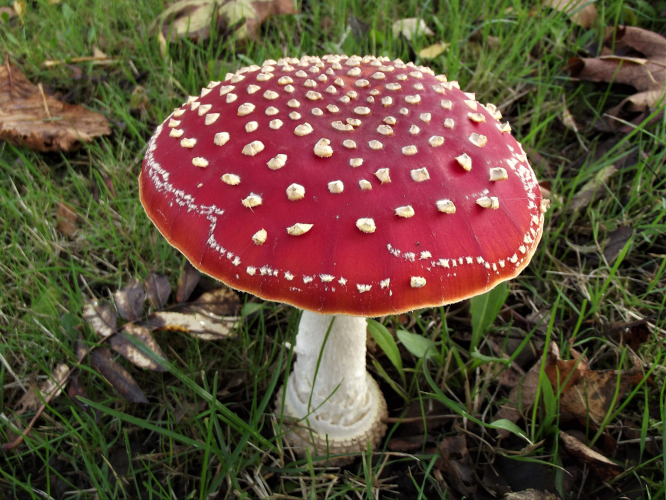

In [4]:
img_path = "predict_001.jpg"
PIL.Image.open(img_path)

Pré-traitement de l'image :

In [5]:
img = tf.keras.utils.load_img(
    img_path, target_size=((224, 224))
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

print(img_array)

tf.Tensor(
[[[[ 91. 124.  53.]
   [ 88. 113.  48.]
   [ 81. 110.  52.]
   ...
   [ 30.  30.  18.]
   [ 30.  44.  11.]
   [ 22.  30.  15.]]

  [[ 90. 115.  50.]
   [ 81. 107.  46.]
   [ 73.  96.  44.]
   ...
   [ 38.  41.  20.]
   [ 38.  56.  18.]
   [ 35.  50.  27.]]

  [[ 87. 101.  48.]
   [ 85.  93.  42.]
   [ 75.  82.  40.]
   ...
   [ 34.  46.  24.]
   [ 37.  59.  20.]
   [ 36.  51.  32.]]

  ...

  [[ 26.  31.   9.]
   [ 32.  35.  16.]
   [ 16.  14.  15.]
   ...
   [ 33.  56.  10.]
   [ 25.  35.  10.]
   [  9.  15.   3.]]

  [[ 27.  32.  12.]
   [ 31.  33.  19.]
   [ 19.  18.  16.]
   ...
   [ 24.  39.   8.]
   [ 15.  24.   7.]
   [  8.  19.   2.]]

  [[ 30.  35.  15.]
   [ 26.  27.  21.]
   [ 27.  26.  24.]
   ...
   [ 18.  27.   8.]
   [ 11.  19.   4.]
   [  8.  16.   1.]]]], shape=(1, 224, 224, 3), dtype=float32)


In [6]:
# Chargement des labels
class_names = np.load('class_names.npy')
class_names

array(['1174', '15162', '1540', '267', '271', '330', '344', '362', '373',
       '382', '401', '407', '42', '4920', '53', '939'], dtype='<U5')

In [7]:
predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(df["name"][int(class_names[np.argmax(score)])], 100*np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
This image most likely belongs to Amanita muscaria with a 15.34 percent confidence.


In [8]:
pd.DataFrame(tf.nn.softmax(predictions[0]))

,0
0,0.056439
1,0.056439
2,0.056439
3,0.056439
4,0.056439
5,0.056439
6,0.056439
7,0.056439
8,0.153417
9,0.056439


In [9]:
pd.DataFrame(predictions[0])

,0
0,3.277990e-20
1,4.397585e-24
2,4.972070e-22
3,1.210056e-21
4,4.083518e-24
5,1.095273e-15
6,9.945834e-22
7,8.938600e-17
8,1.000000e+00
9,1.081755e-19


Aller, une autre pour la route ?

In [91]:
def champi_predict(url):
    champi_path = tf.keras.utils.get_file(origin=url)
    img = tf.keras.utils.load_img(champi_path, target_size=(224, 224))
    
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = loaded_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    return print("PREDICTION : ", df["name"][int(class_names[np.argmax(score)])])

In [136]:
# Modification du Dataframe pour y ajouter des images de tests issue de Wikipédia
df['name'] = df['name'].astype(str)
df['url'] = df['url'].astype(str)
display(df)
display(df.dtypes)

,name,url
id,,
42,Trametes versicolor,https://upload.wikimedia.org/wikipedia/commons...
53,Stropharia ambigua,https://upload.wikimedia.org/wikipedia/commons...
267,Fuligo septica,https://upload.wikimedia.org/wikipedia/commons...
330,Cantharellus cinnabarinus,https://upload.wikimedia.org/wikipedia/commons...
344,Boletus edulis,https://upload.wikimedia.org/wikipedia/commons...
362,Amanita velosa,https://upload.wikimedia.org/wikipedia/commons...
373,Amanita muscaria,https://upload.wikimedia.org/wikipedia/commons...
382,Amanita bisporigera,https://upload.wikimedia.org/wikipedia/commons...
401,Agaricus augustus,https://upload.wikimedia.org/wikipedia/commons...


name    object
url     object
dtype: object

----------
TRAMETES VERSICOLOR


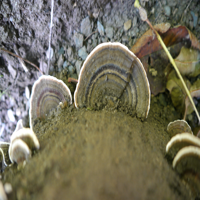

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
PREDICTION :  Trametes versicolor


----------
STROPHARIA AMBIGUA


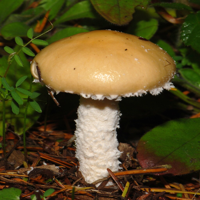

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
PREDICTION :  Amanita velosa


----------
FULIGO SEPTICA


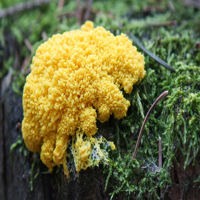

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
PREDICTION :  Fuligo septica


----------
CANTHARELLUS CINNABARINUS


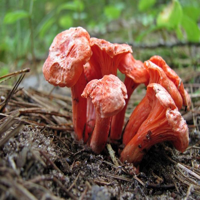

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
PREDICTION :  Cantharellus cinnabarinus


----------
BOLETUS EDULIS


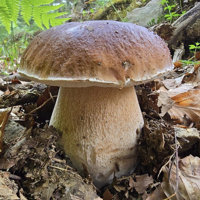

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
PREDICTION :  Boletus edulis


----------
AMANITA VELOSA


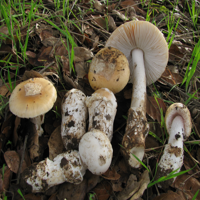

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
PREDICTION :  Amanita velosa


----------
AMANITA MUSCARIA


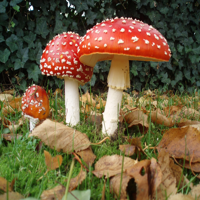

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
PREDICTION :  Amanita muscaria


----------
AMANITA BISPORIGERA


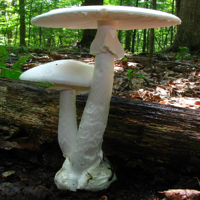

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
PREDICTION :  Amanita bisporigera


----------
AGARICUS AUGUSTUS


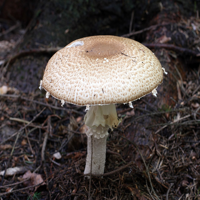

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
PREDICTION :  Agaricus augustus


----------
CERATIOMYXA FRUTICULOSA


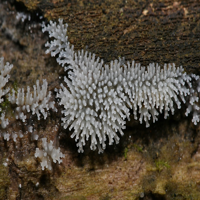

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
PREDICTION :  Ceratiomyxa fruticulosa


----------
BOLETINELLUS MERULIOIDES


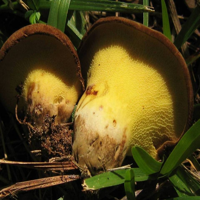

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
PREDICTION :  Boletinellus merulioides


----------
BOLBITIUS TITUBANS


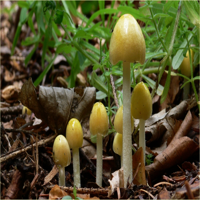

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
PREDICTION :  Bolbitius titubans


----------
CRATERELLUS FALLAX


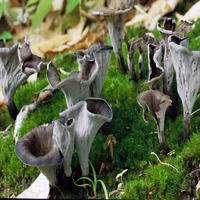

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
PREDICTION :  Craterellus fallax


----------
MYCENA HAEMATOPUS


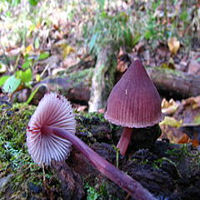

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
PREDICTION :  Mycena haematopus


----------
GANODERMA OREGONENSE


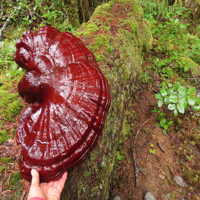

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
PREDICTION :  Ganoderma oregonense


----------
FLAMMULINA VELUTIPES


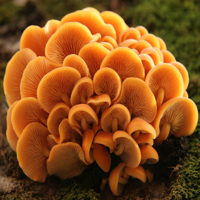

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
PREDICTION :  Flammulina velutipes




In [154]:
for index, specie in df.iterrows():
    print('----------')
    url = specie['url']
    print(str.upper(specie['name']))
    img =PIL.Image.open(tf.keras.utils.get_file(origin=url)).resize((200, 200))
    display(img)
    champi_predict(url)
    print('\n')